In [1]:
import pandas as pd
import os
%pwd

u'/Users/Driz/data_sci_wk3'

In [2]:
data = pd.read_csv('../downloads/used_cars.csv')

In [3]:
data.head()

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [4]:
data['price'].describe()

count       14.000000
mean      6571.428571
std       6161.097376
min       1300.000000
25%       2125.000000
50%       3500.000000
75%       9375.000000
max      22000.000000
Name: price, dtype: float64

In [5]:
data['year'].describe()

count      14.000000
mean     2004.857143
std         4.382784
min      1997.000000
25%      2003.000000
50%      2004.000000
75%      2008.500000
max      2012.000000
Name: year, dtype: float64

In [6]:
data['miles'].describe()

count        14.000000
mean     114464.285714
std       63198.242516
min       13000.000000
25%       64875.000000
50%      131000.000000
75%      162250.000000
max      209000.000000
Name: miles, dtype: float64

In [7]:
data['doors'].describe()

count    14.000000
mean      3.142857
std       1.027105
min       2.000000
25%       2.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: doors, dtype: float64

In [8]:
data['doors'].value_counts()

4    8
2    6
Name: doors, dtype: int64

In [9]:
data['type'].describe()

count      14
unique      2
top       car
freq       11
Name: type, dtype: object

In [10]:
data['type'].value_counts()

car      11
truck     3
Name: type, dtype: int64

In [11]:
data['is_car'] = data['type'].apply(lambda x: 1 if x == 'car' else 0)
print data

    price  year   miles  doors   type  is_car
0   22000  2012   13000      2    car       1
1   14000  2010   30000      2    car       1
2   13000  2010   73500      4    car       1
3    9500  2009   78000      4    car       1
4    9000  2007   47000      4    car       1
5    4000  2006  124000      2    car       1
6    3000  2004  177000      4    car       1
7    2000  2004  209000      4  truck       0
8    3000  2003  138000      2    car       1
9    1900  2003  160000      4    car       1
10   2500  2003  190000      2  truck       0
11   5000  2001   62000      4    car       1
12   1800  1999  163000      2  truck       0
13   1300  1997  138000      4    car       1


In [12]:
y = data['price']

In [13]:
x = data[['year', 'miles', 'doors', 'is_car']]

In [14]:
from sklearn.cross_validation import train_test_split

In [15]:
# look into what random_state is 
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=42, 
                                                   test_size=0.30)

In [16]:
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(9, 4)
(5, 4)
(9,)
(5,)


In [17]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

In [18]:
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [19]:
# first car worth 3000, next one 13000
decision_tree.predict(x_train)

array([  3000.,  13000.,  14000.,   1300.,   9000.,   2000.,   2500.,
         9500.,   3000.])

In [20]:
# hey it predicted perfectly! 
y_train

8      3000
2     13000
1     14000
13     1300
4      9000
7      2000
10     2500
3      9500
6      3000
Name: price, dtype: int64

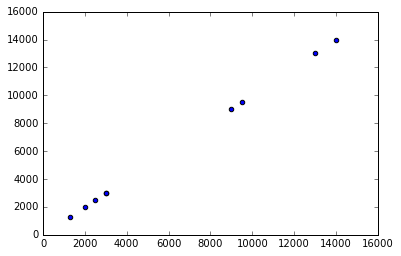

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_train, decision_tree.predict(x_train))

In [22]:
# perfect prediction....overfit!
from sklearn.metrics import r2_score
r2_score(y_train, decision_tree.predict(x_train))

1.0

In [23]:
y_test

9      1900
11     5000
0     22000
12     1800
5      4000
Name: price, dtype: int64

In [24]:
# this is crap at predicting on test data
decision_tree.predict(x_test)

array([  3000.,   9000.,  14000.,   1300.,   3000.])

(0, 25000)

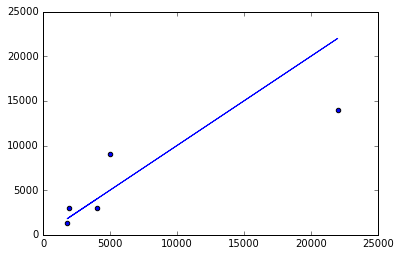

In [25]:
# does not look very good
plt.scatter(y_test,decision_tree.predict(x_test))
plt.plot(y_test, y_test)
plt.ylim((0, 25000))
plt.xlim((0, 25000))
# fix graph from codealong, part is missing

In [26]:
import numpy as np
def find_mse(y_true, y_pred):
    values = []
    for value in zip(y_true, y_pred):
        values.append((value[0]-value[1])**2)
    return np.mean(values)

find_mse(y_test, decision_tree.predict(x_test))

16492000.0

In [27]:
def make_pretty_plots(y_true, y_pred):
    plt.scatter(y_true, y_pred)
    plt.plot(y_true, y_true)
    plt.ylim((0, 25000))
    plt.xlim((0, 25000))
    plt.show()

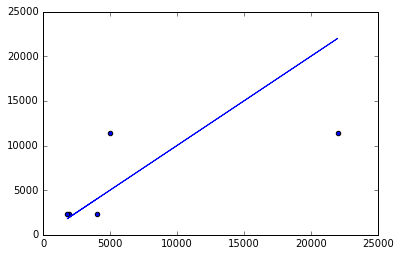

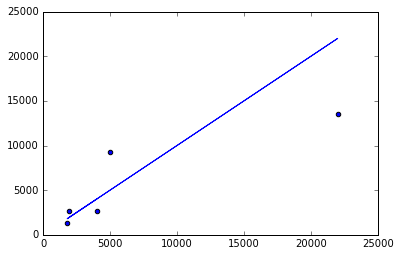

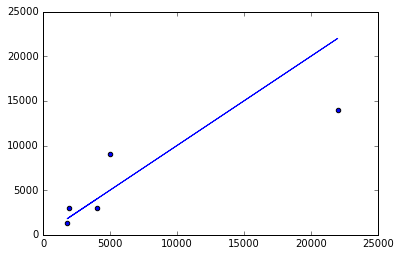

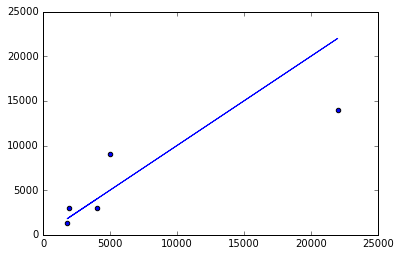

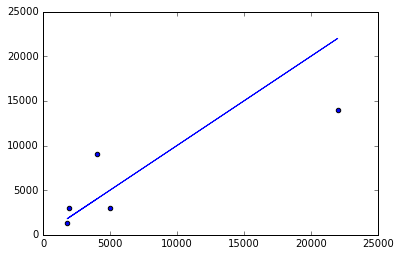

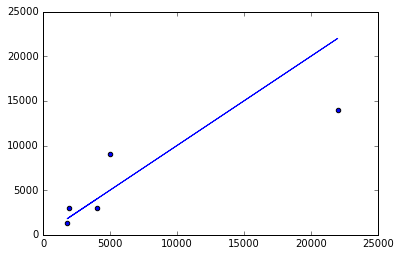

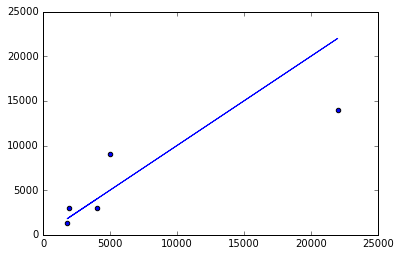

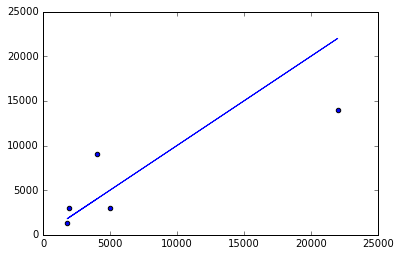

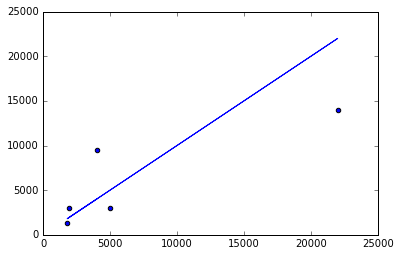

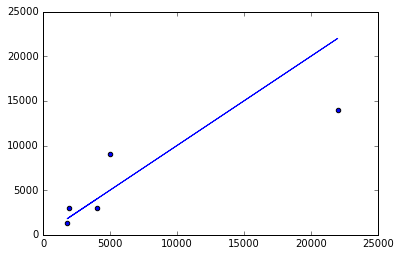

In [28]:
# have a loop to go through
# make 10 different trees
list_of_mse = []

for x in range(1, 11):
    new_decision_tree = DecisionTreeRegressor(max_depth=x)
    new_decision_tree.fit(x_train, y_train)
    predictions = new_decision_tree.predict(x_test)
    make_pretty_plots(y_test, predictions)
    mse = find_mse(y_test, predictions)
    list_of_mse.append(mse)

Did well at start then got kinda crappy. Tree is getting more overfit as we go on

In [29]:
# for every run of iteration here is mse
list_of_mse

[31349210.0,
 18595750.0,
 16492000.0,
 16492000.0,
 18892000.0,
 16492000.0,
 16492000.0,
 18892000.0,
 19942000.0,
 16492000.0]

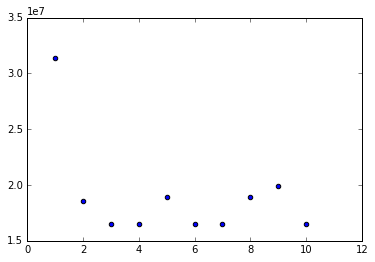

In [30]:
plt.scatter(range(1,11), list_of_mse)

lowe depth will suggest little less overfitting. Pick lowest. We can grid search over this instead

In [31]:
# what features contributed most to splitting apart
# look where we defined our x to see correlation. 
# x = data[['year', 'miles', 'doors', 'is_car']]
decision_tree.feature_importances_

array([ 0.09728871,  0.8974352 ,  0.00248287,  0.00279323])

In [34]:
feature_names = ['year', 'miles', 'doors', 'is_car']

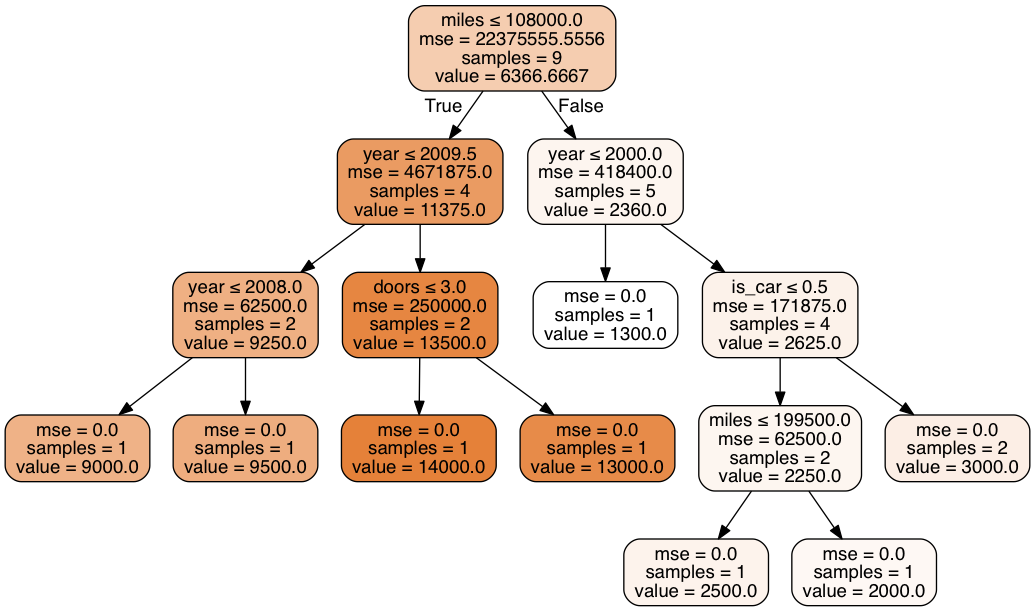

In [36]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,  
                feature_names=feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [40]:
from sklearn.grid_search import GridSearchCV

In [41]:
params = {
    'max_depth' : [1,2,3,4],
    'max_features' : [1,2,3,4],
    'max_leaf_nodes' : [2,3,4,5]
}

In [43]:
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), 
                           param_grid=params,
                           verbose=10)
decision_function = DecisionTreeRegressor()

grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] max_features=1, max_leaf_nodes=2, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=2, max_depth=1, score=0.496419 -   0.0s
[CV] max_features=1, max_leaf_nodes=2, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=2, max_depth=1, score=-0.443464 -   0.0s
[CV] max_features=1, max_leaf_nodes=2, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=2, max_depth=1, score=0.763279 -   0.0s
[CV] max_features=1, max_leaf_nodes=3, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=3, max_depth=1, score=0.495304 -   0.0s
[CV] max_features=1, max_leaf_nodes=3, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=3, max_depth=1, score=0.357541 -   0.0s
[CV] max_features=1, max_leaf_nodes=3, max_depth=1 ...................
[CV]  max_features=1, max_leaf_nodes=3, max_depth=1, score=0.894426 -   0.0s
[CV] max_features=1, max_leaf_nodes=4, max_depth=

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s


[CV]  max_features=4, max_leaf_nodes=5, max_depth=1, score=0.906509 -   0.0s
[CV] max_features=4, max_leaf_nodes=5, max_depth=1 ...................
[CV]  max_features=4, max_leaf_nodes=5, max_depth=1, score=0.407459 -   0.0s
[CV] max_features=1, max_leaf_nodes=2, max_depth=2 ...................
[CV]  max_features=1, max_leaf_nodes=2, max_depth=2, score=0.496419 -   0.0s
[CV] max_features=1, max_leaf_nodes=2, max_depth=2 ...................
[CV]  max_features=1, max_leaf_nodes=2, max_depth=2, score=0.639456 -   0.0s
[CV] max_features=1, max_leaf_nodes=2, max_depth=2 ...................
[CV]  max_features=1, max_leaf_nodes=2, max_depth=2, score=0.084354 -   0.0s
[CV] max_features=1, max_leaf_nodes=3, max_depth=2 ...................
[CV]  max_features=1, max_leaf_nodes=3, max_depth=2, score=-0.980574 -   0.0s
[CV] max_features=1, max_leaf_nodes=3, max_depth=2 ...................
[CV]  max_features=1, max_leaf_nodes=3, max_depth=2, score=0.909113 -   0.0s
[CV] max_features=1, max_leaf_node

[Parallel(n_jobs=1)]: Done  60 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  84 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  97 tasks       | elapsed:    0.5s


[CV]  max_features=4, max_leaf_nodes=2, max_depth=2, score=0.496419 -   0.0s
[CV] max_features=4, max_leaf_nodes=2, max_depth=2 ...................
[CV]  max_features=4, max_leaf_nodes=2, max_depth=2, score=0.639456 -   0.0s
[CV] max_features=4, max_leaf_nodes=2, max_depth=2 ...................
[CV]  max_features=4, max_leaf_nodes=2, max_depth=2, score=0.763279 -   0.0s
[CV] max_features=4, max_leaf_nodes=3, max_depth=2 ...................
[CV]  max_features=4, max_leaf_nodes=3, max_depth=2, score=0.466014 -   0.0s
[CV] max_features=4, max_leaf_nodes=3, max_depth=2 ...................
[CV]  max_features=4, max_leaf_nodes=3, max_depth=2, score=0.357541 -   0.0s
[CV] max_features=4, max_leaf_nodes=3, max_depth=2 ...................
[CV]  max_features=4, max_leaf_nodes=3, max_depth=2, score=0.443607 -   0.0s
[CV] max_features=4, max_leaf_nodes=4, max_depth=2 ...................
[CV]  max_features=4, max_leaf_nodes=4, max_depth=2, score=0.466014 -   0.0s
[CV] max_features=4, max_leaf_nodes

[Parallel(n_jobs=1)]: Done 112 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 127 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 144 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:    0.7s


[CV]  max_features=4, max_leaf_nodes=2, max_depth=3, score=0.639456 -   0.0s
[CV] max_features=4, max_leaf_nodes=2, max_depth=3 ...................
[CV]  max_features=4, max_leaf_nodes=2, max_depth=3, score=0.763279 -   0.0s
[CV] max_features=4, max_leaf_nodes=3, max_depth=3 ...................
[CV]  max_features=4, max_leaf_nodes=3, max_depth=3, score=0.466014 -   0.0s
[CV] max_features=4, max_leaf_nodes=3, max_depth=3 ...................
[CV]  max_features=4, max_leaf_nodes=3, max_depth=3, score=0.357541 -   0.0s
[CV] max_features=4, max_leaf_nodes=3, max_depth=3 ...................
[CV]  max_features=4, max_leaf_nodes=3, max_depth=3, score=0.443607 -   0.0s
[CV] max_features=4, max_leaf_nodes=4, max_depth=3 ...................
[CV]  max_features=4, max_leaf_nodes=4, max_depth=3, score=0.466014 -   0.0s
[CV] max_features=4, max_leaf_nodes=4, max_depth=3 ...................
[CV]  max_features=4, max_leaf_nodes=4, max_depth=3, score=0.909113 -   0.0s
[CV] max_features=4, max_leaf_nodes

[Parallel(n_jobs=1)]: Done 180 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4], 'max_leaf_nodes': [2, 3, 4, 5], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [44]:
# shows good stuff to use
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=2,
           max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [45]:
grid_search.best_score_

0.77328179676833075

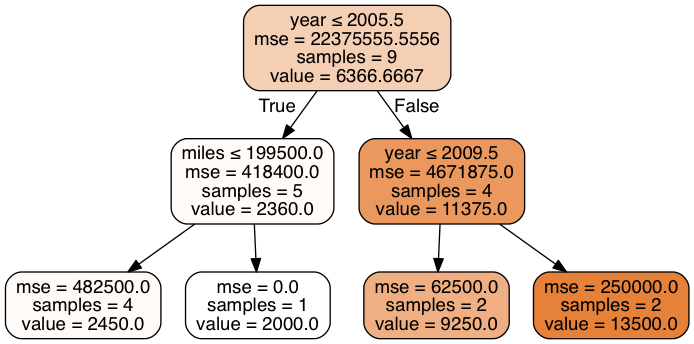

In [46]:
feature_names = ['year', 'miles', 'doors', 'is_car']

dot_data = StringIO()  
export_graphviz(grid_search.best_estimator_, out_file=dot_data,  
                feature_names=feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

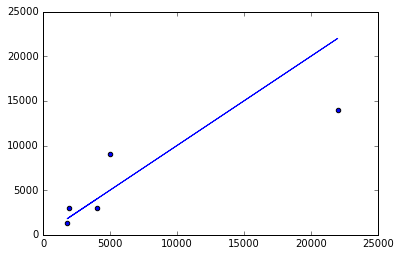

In [47]:
best_estimator = grid_search.best_estimator_ 
prdictions = best_estimator.predict(x_test)
make_pretty_plots(y_test, predictions)

In [48]:
print y_test, predictions

9      1900
11     5000
0     22000
12     1800
5      4000
Name: price, dtype: int64 [  3000.   9000.  14000.   1300.   3000.]
